In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import great

# Exercise 2 - Series of models

One of the interests of [GREAT](https://www.uv.es/cerdupa/codes/GREAT/) is its application to series of models. In [Torres-Forné et al 2018](https://arxiv.org/abs/1708.01920), [2019a](https://arxiv.org/abs/1806.11366), [2019b](https://arxiv.org/abs/1902.10048), [Wolfe et al 2023](https://arxiv.org/abs/2303.16962) it was applied to time sequences models one could follow the time evolution of the oscillation modes of the proto-neutron star:

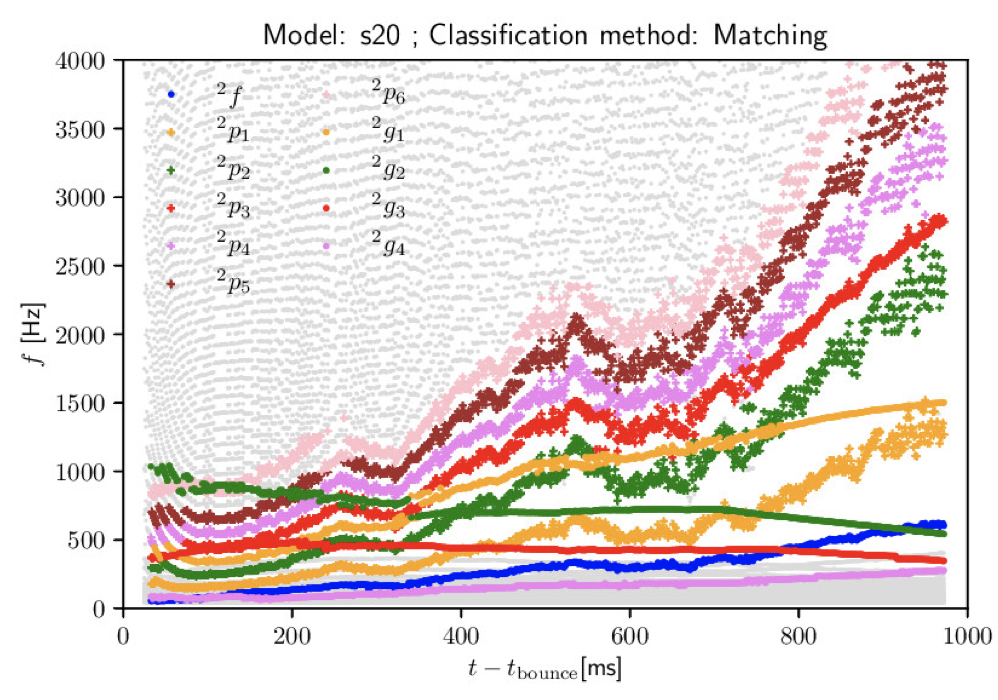

Within great and in the output files the time is tracked through the ``time`` and ``nt`` variables. ``time`` is the variable changes along the sequence (time in this example) and ``nt`` the index keeping track of files. Note that instead of time-sequences there one can use these two variables to create any sequence that one may wish (the name ``time`` is hardcoded in GREAT although this may change in the future). Examples could be:
* Sequences of stars with increasing mass
* Sequences of stars with varying thermal properties
* Sequences of stars varying some EOS parameter
* ...

In this section we will learn to create sequences of models and read the data.


### Simple model with buoyancy

This model is an extension of the model seen in the exercise 1. Consider a sphere of radius $R=1$ and constant sound speed squared $c_s^2$. We use the same ideal gas EOS, $P=\rho\epsilon (\Gamma-1)$, with $\Gamma=4/3$. For the density we prescribe

$$ \rho = \begin{cases} 1 & r < r_{\rm min}\\ e^{-(r-r_{\rm min})/r_{G}} & r \ge r_{\rm min}\end{cases}$$

with $r_{\rm min}=1/2$. The value of $r_{G}$ is related to the Brunt-Väisälä frequency, $\mathcal{N}^2$, by:

$$ r_G = \sqrt{\frac{\Gamma - 1}{\Gamma^2} \frac{c_s^2}{\mathcal{N}^2}}$$

Note that only positive values of $\mathcal{N}^2$ are possible. We focus in $l=2$ modes.


### Running the code

``test_seq.f90`` implements this simple model. It can be compiled with

``make test_seq``

copy the parameters file

``cp parameters_seq parameters``

and executed with

``./bin/test_seq``

The value of $\mathcal{N}^2$ is stored in ``time``.

**<font color="blue">  Spend some time understanding how the code is written and run it. If the code runs too slow means that you are computing too many models. By default it runs 100 models (nt=100), but test_seq.f90 can be modify to reduce this number.</font>**



### Reading background data

We use the same data reader as for one file but now we define ``bg`` as a dictionary and iterate over all the output:

In [ ]:
## Read multiple files
dir="../output"
bg={}
for nt in range(100):
    bg[nt]=great.ReadBackground(dir,nt)
    

To access each of the models, parametrized by an index, you use ``bg[0]`` (e.g. to access nt=0), which returns a database with all the background data (same as in exercise 1). Now you could plot the background profile for this index:

In [ ]:
# Change this index to access the different models in the sequence
nt=3
plt.figure(figsize=(4,3),dpi=150)
plt.title(r"$\mathcal{N}^2=%.4f$" % (bg[nt].time[0]))
plt.plot(bg[nt].r,bg[nt].N2)
plt.xlabel("r [km]")
plt.ylabel(r"$\mathcal{N}^2$")
plt.show()

**<font color="blue">  Try to plot other quantities such as $\rho$.  </font>**


### Reading eigenvalues and eigenfunctions

We use a similar trick with the eigenfrequencies and the eigenfunctions.

In [ ]:
EigenFreq={}
EigenFunc={}
for nt in range(len(bg)):
    EigenFreq[nt], EigenFunc[nt]=great.ReadEigenfunctions(dir,nt)

Now we can plot how the eigenfrequencies depend on the value of $\mathcal{N}^2$. Since we have a positively bouayant region now we have both g-modes and p-modes. Roughly speaking, the frequency of p-modes should scale as $c_s/R=$constant, while the frequency of g-modes goes as $\sqrt{\mathcal{N}^2}$. We overplot these two scaling to guide the eye. We use the parameters ``nt0`` and ``nf0`` to highlight a particular mode (red dot).

In [ ]:
nt0=0 #0
nf0=12 #12
plt.figure(figsize=(4,3),dpi=150)
for nt in range(len(EigenFreq)):
    freqs=EigenFreq[nt].freqs
    nf = len(freqs)
    N2= bg[nt].time[0] * np.ones(nf)
    plt.plot(N2,freqs, ".", color="black", markersize=1)
plt.plot(bg[nt0].time[0], EigenFreq[nt0].freqs[nf0],".", color="red")
x=10**np.linspace(-2,3,num=100)
plt.plot(x,np.sqrt(x), "--")
plt.axhline(2*np.pi,linestyle="--")
plt.xlabel(r"$\mathcal{N}^2$")
plt.ylabel(r"$\sigma$")
plt.yscale("log")
plt.xscale("log")
plt.xlim((0.01,1e3))
plt.ylim((1e-3,50))
plt.show()

**<font color="blue">  Check the scaling of the p-mode frequencies by changing the sound speed and/or the domain size. Are there unstable modes? </font>**



Now we plot the eigenfunctions. The code is a simpole modification of the one in exercise 1, adding the reference to nt wherever necessary. nt and nf can be used to select a particular eigenmode. 

In [ ]:
nt=0 # <== change the model here
nf=12 # <== change the eigenfunction here
plt.figure(figsize=(4,3),dpi=150)
plt.title(r"$\sigma_{%1g}=%3.3f$" % (nf,EigenFreq[nt].freqs[nf]))
plt.plot(EigenFunc[nt].r[nf],EigenFunc[nt].etar[nf], label=r"$\eta_r$")
plt.plot(EigenFunc[nt].r[nf],EigenFunc[nt].etap[nf]/EigenFunc[nt].r[nf], label=r"$\eta_\perp/r$")
plt.xlabel(r"$r$")
plt.legend()
plt.show()

**<font color="blue">  Use the frequency vs $\mathcal{N}^2$  plot above to search the appropriate index for the mode that you want to display (moving the red dot). Start with the lowest $\mathcal{N}^2$ (nt=0) and search for the mode with $\sigma\sim 3$. This is the f-mode (similar to the case of the exercise 1), and the modes above are p-mode. The modes below are g-modes. Check how the eigenfunctions change as you increase or decrease the frequency starting at the f-mode.  </font>**

* **<font color="blue"> How does the number of nodes changes?  </font>**
* **<font color="blue"> How does the shape/location changes?  </font>**
* **<font color="blue"> What happens if you compute $l=0$ modes instead?  </font>**
